# estimatebg


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

In [2]:
/bin/rm -rf 2254 
download_chandra_obsid 2254 --exclude=vvref,osol,eph1


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      229 Mb  ####################            4 s  63999.4 kb/s
  evt2     fits       23 Mb  ####################          < 1 s  76076.0 kb/s
  asol     fits       20 Mb  ####################          < 1 s  71105.3 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  37990.6 kb/s
  stat     fits        3 Mb  ####################          < 1 s  50207.5 kb/s
  aqual    fits        1 Mb  ####################          < 1 s  18203.8 kb/s
  bias     fits      494 Kb  ####################          < 1 s  19778.9 kb/s
  bias     fits      433 Kb  ####################          < 1 s  14491.6 kb/s
  bias     fits      431 Kb  ####################          < 1 s  19579.8 kb/s
  bias     fits      430 Kb  ####################          < 1 s  24098.4 kb/s
  bias     fits      429 Kb  ####################    

In [3]:
chandra_repro 2254 out=`pwd` clobber=yes


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/estimatebg/2254'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/estimatebg/acisf02254_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/estimatebg/acisf02254_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with the new prod

## Create Image

In [4]:
fluximage acisf02254_repro_evt2.fits"[ccd_id=0:3]" 3C295 bin=2 band=broad clob+

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf02254_000N001_asol1.fits found.
Bad-pixel file acisf02254_repro_bpix1.fits found.
Mask file acisf02254_000N004_msk1.fits found.

The output images will have 1367 by 1368 pixels, pixel size of 0.984 arcsec,
    and cover x=2786.5:5520.5:2,y=2760.5:5496.5:2.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 2254
Creating 4 instrument maps for obsid 2254
Creating 4 exposure maps for obsid 2254
Combining 4 exposure maps for obsid 2254
Thresholding data for obsid 2254
Exposure-correcting image for obsid 2254

The following files were created:

 The clipped counts image is:
     3C295_broad_thresh.img

 The clipped exposure map is:
     3C295_broad_thresh.expmap

 The exposure-corrected image is:
     3C295_broad_flux.img



## Add field of view info into file so down stream tools know where the chip edges are

In [5]:
dmcopy "3C295_broad_thresh.img[sky=region(acisf02254_repro_fov1.fits[ccd_id=0:3])][opt full]" \
  3C295_broad_dss.img cl+

In [6]:
dmlist 3C295_broad_dss.img subspace 

 
--------------------------------------------------------------------------------
Data subspace for block EVENTS_IMAGE: Components: 4 Descriptors: 17 
--------------------------------------------------------------------------------
 
 --- Component 1 --- 
   1 sky                  Real8               Polygon(4149.15,4126.58,4149.15,4126.55,4149.17,4126.36,4149.28,4126.12,4149.5,4126,4149.54,4125.98,4150.43,4125.61,5090.58,3739.26,5113.77,3729.86,5118.87,3727.88,5121.39,3727.11,5121.42,3727.11,5121.43,3727.11,5122.19,3727.31,5122.2,3727.32,5123.14,3728.65,5123.32,3728.96,5125.29,3733.51,5510.1,4676.59,5518.81,4698.15,5519.67,4700.61,5519.78,4701.03,5519.82,4701.76,5519.78,4701.83,5519.67,4701.98,5519.6,4702.04,5518.26,4702.74,5494.86,4712.43,4554.46,5098.51,4553.57,5098.87,4550.16,5099.91,4550.07,5099.93,4545.44,5100.05,4545.26,5099.75,4545.24,5099.7,4160.68,4156.66,4150.66,4131.04,4150.23,4129.94,4149.32,4127.25,4149.15,4126.58)...[truncated]
   1 sky                  Real8           

## Get max pixel value

also see number of null pixels is > 0

In [7]:
dmstat 3C295_broad_dss.img cen-

EVENTS_IMAGE
    min:	0 	      @:	( 4719.5 2763.5 )
    max:	553 	      @:	( 4007.5 4249.5 )
   mean:	0.07087140162 
  sigma:	0.92042113467 
    sum:	77873 
   good:	1098793 
   null:	771263 


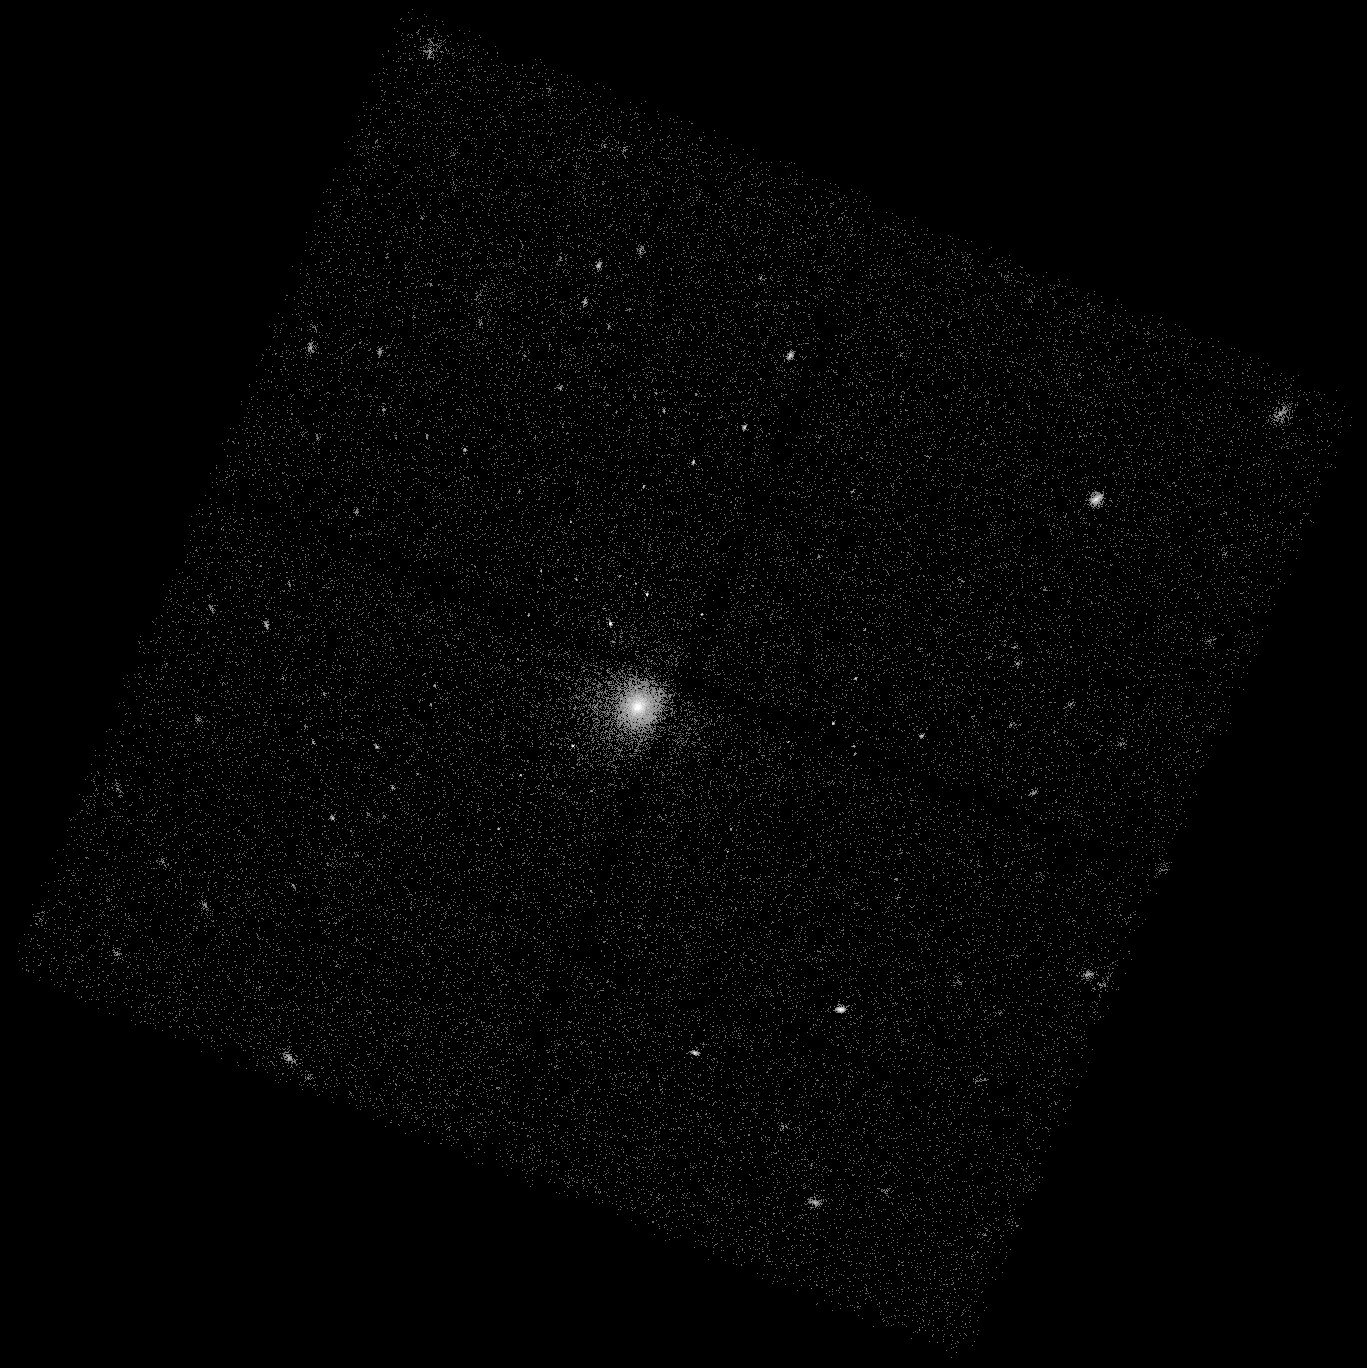

In [8]:
dmimg2jpg infile=3C295_broad_dss.img outfile=3C295_broad_dss.jpg\
  scalefun=log clob+ minred=0 maxred=50 mode=h

display < 3C295_broad_dss.jpg

## Smooth Image

In [9]:
pset aconvolve infile=3C295_broad_dss.img
pset aconvolve outfile=3C295_broad_dss_sm.img
pset aconvolve kernelspec="lib:gaus(2,5,1,3,3)"
pset aconvolve meth=fft
aconvolve mode=h clob+

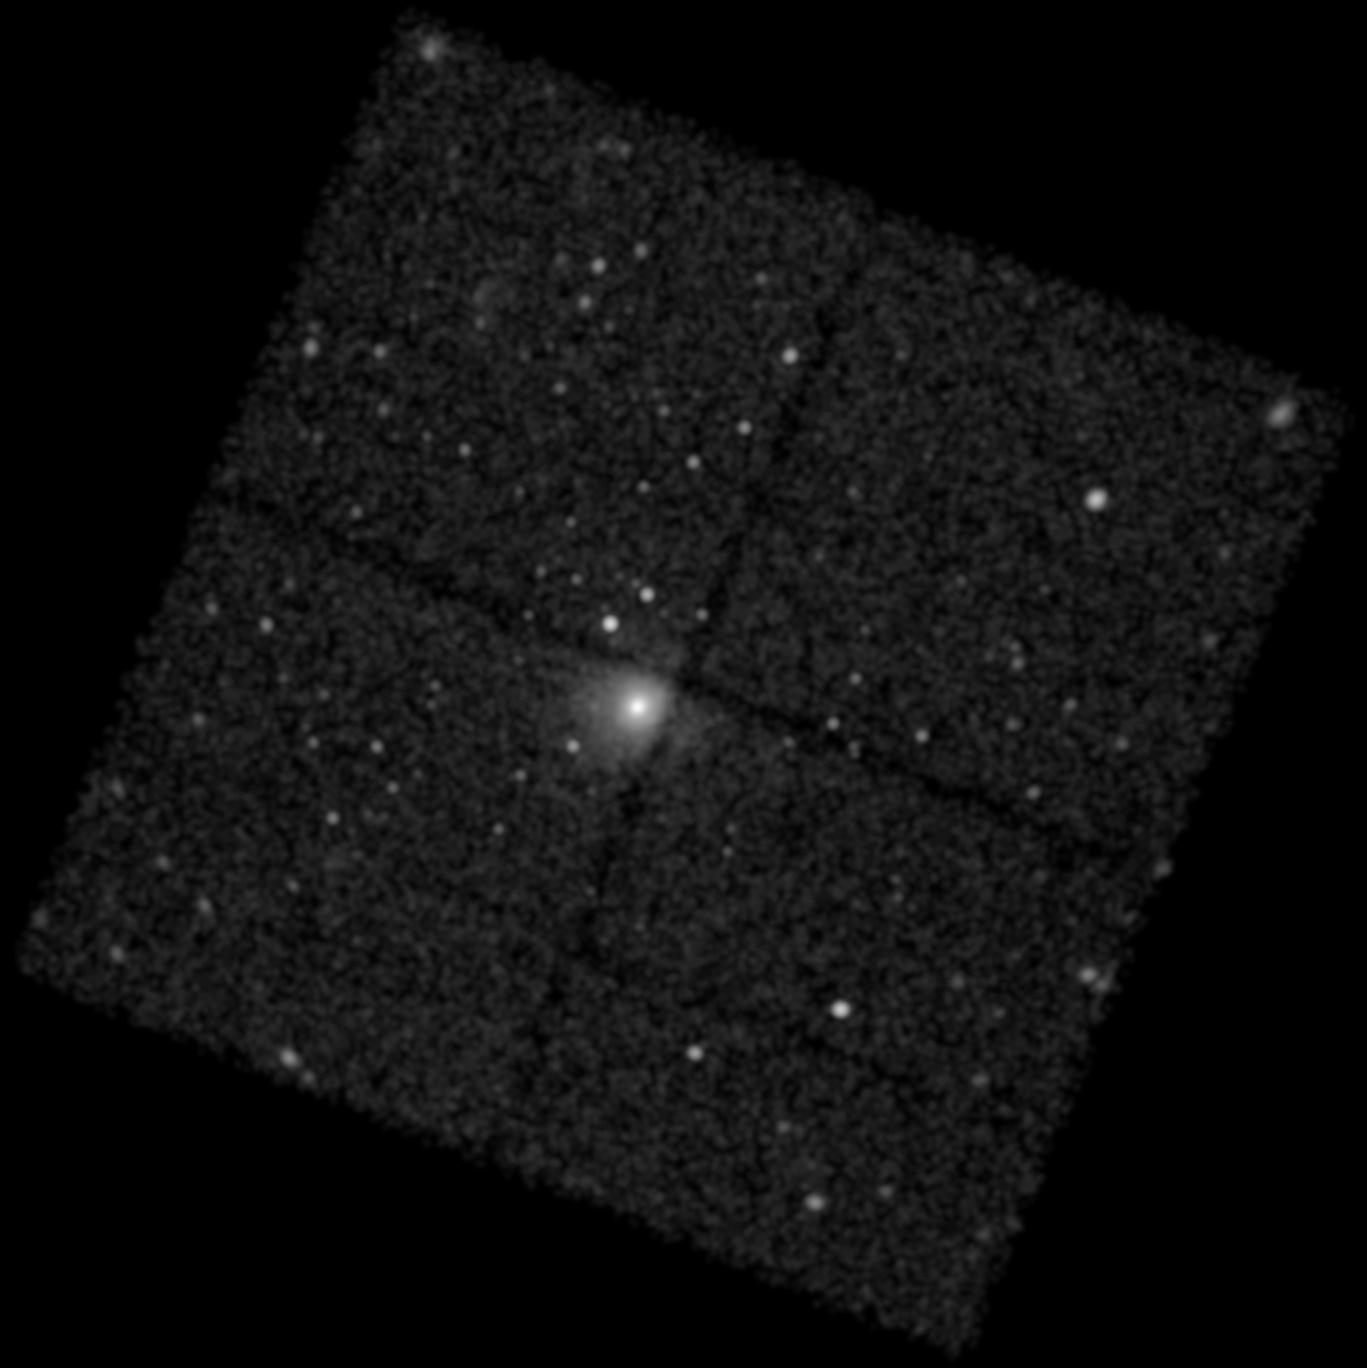

In [10]:
dmimg2jpg infile=3C295_broad_dss_sm.img outfile=3C295_broad_dss_sm.jpg\
  scalefun=log clob+ minred=0 maxred=50 mode=h

display < 3C295_broad_dss_sm.jpg

## Median Ring

In [11]:
pset dmimgfilt infile=3C295_broad_dss_sm.img
pset dmimgfilt outfile=3C295_broad_dss.bg
pset dmimgfilt function=median
pset dmimgfilt mask="annulus(0,0,20,22)"
dmimgfilt mode=h clob+

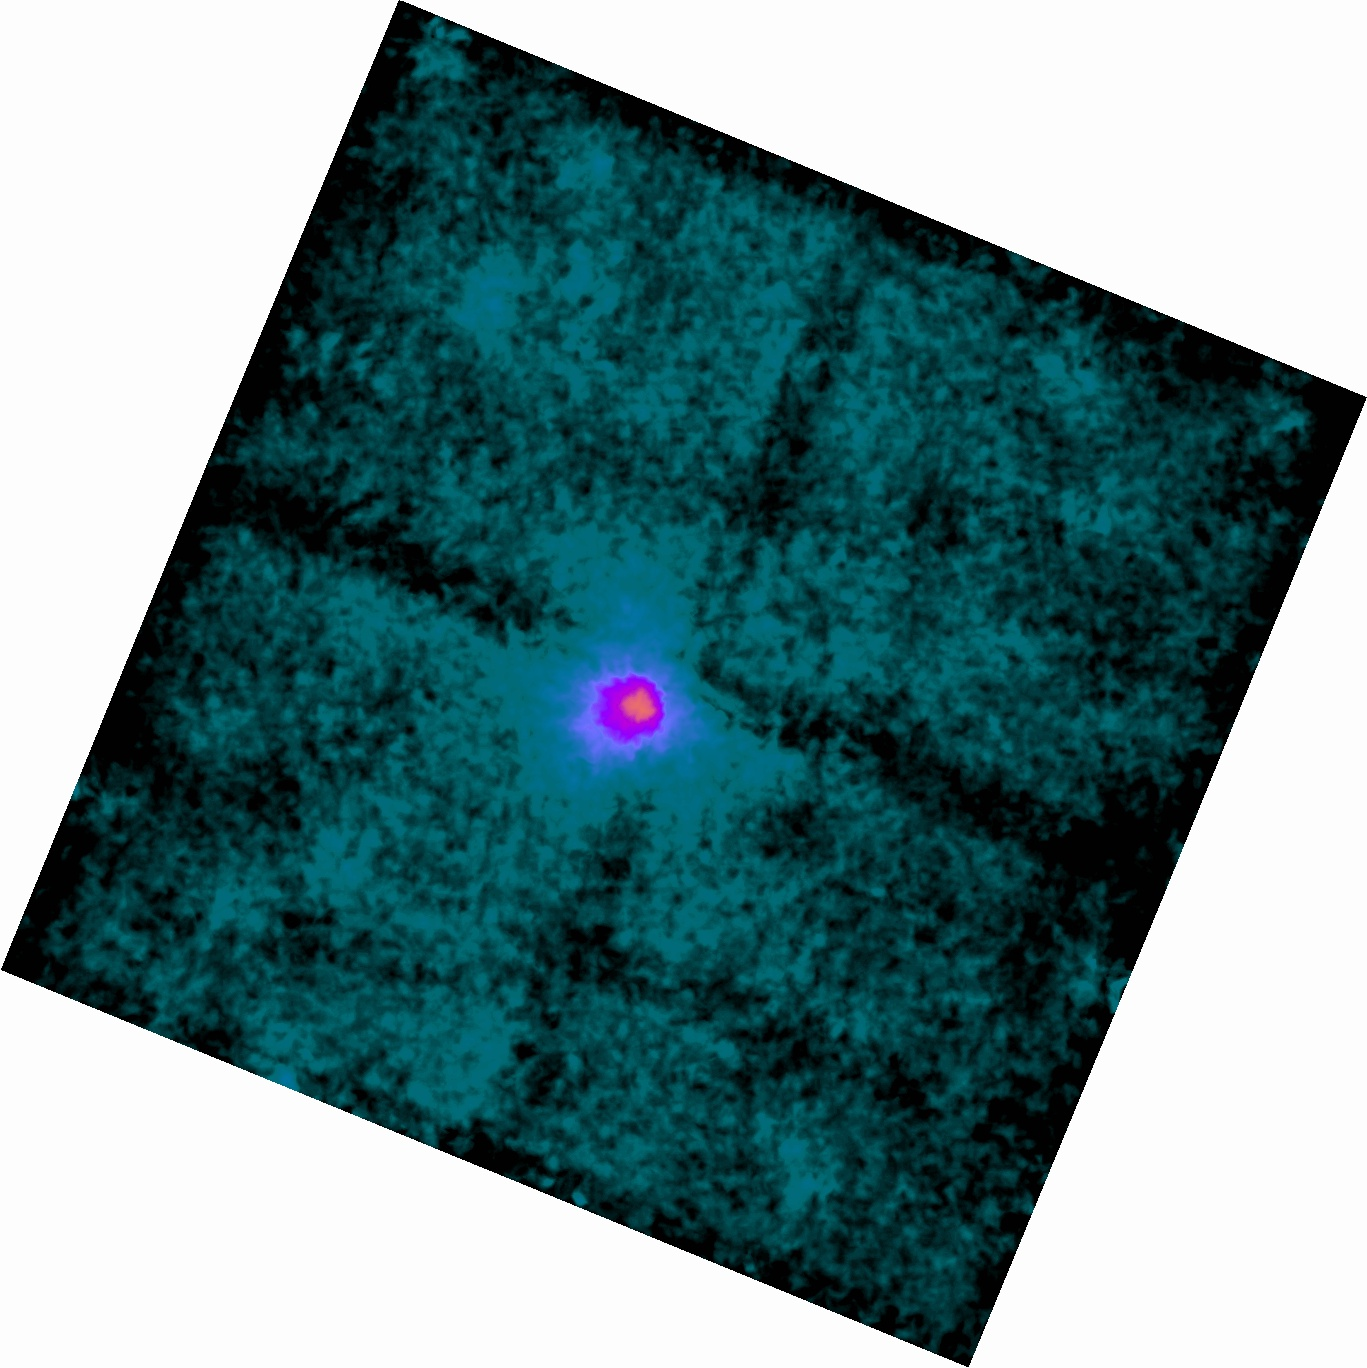

In [12]:
dmimg2jpg infile=3C295_broad_dss.bg outfile=3C295_broad_dss.bg.jpg\
  scalefun=log clob+ minred=0 maxred=25 mode=h lut=")imagej_lut.cequal"

display < 3C295_broad_dss.bg.jpg

## Using with Wavdetect

In [13]:
# Skip reproject_image, already same size/scale/tan

### Same as before, add FOV info to expmap file subspace

In [14]:
dmcopy "3C295_broad_thresh.expmap[sky=region(acisf02254_repro_fov1.fits[ccd_id=0:3])][opt full]" \
  3C295_broad_dss.expmap cl+

### Smooth expmap on same scale as counts

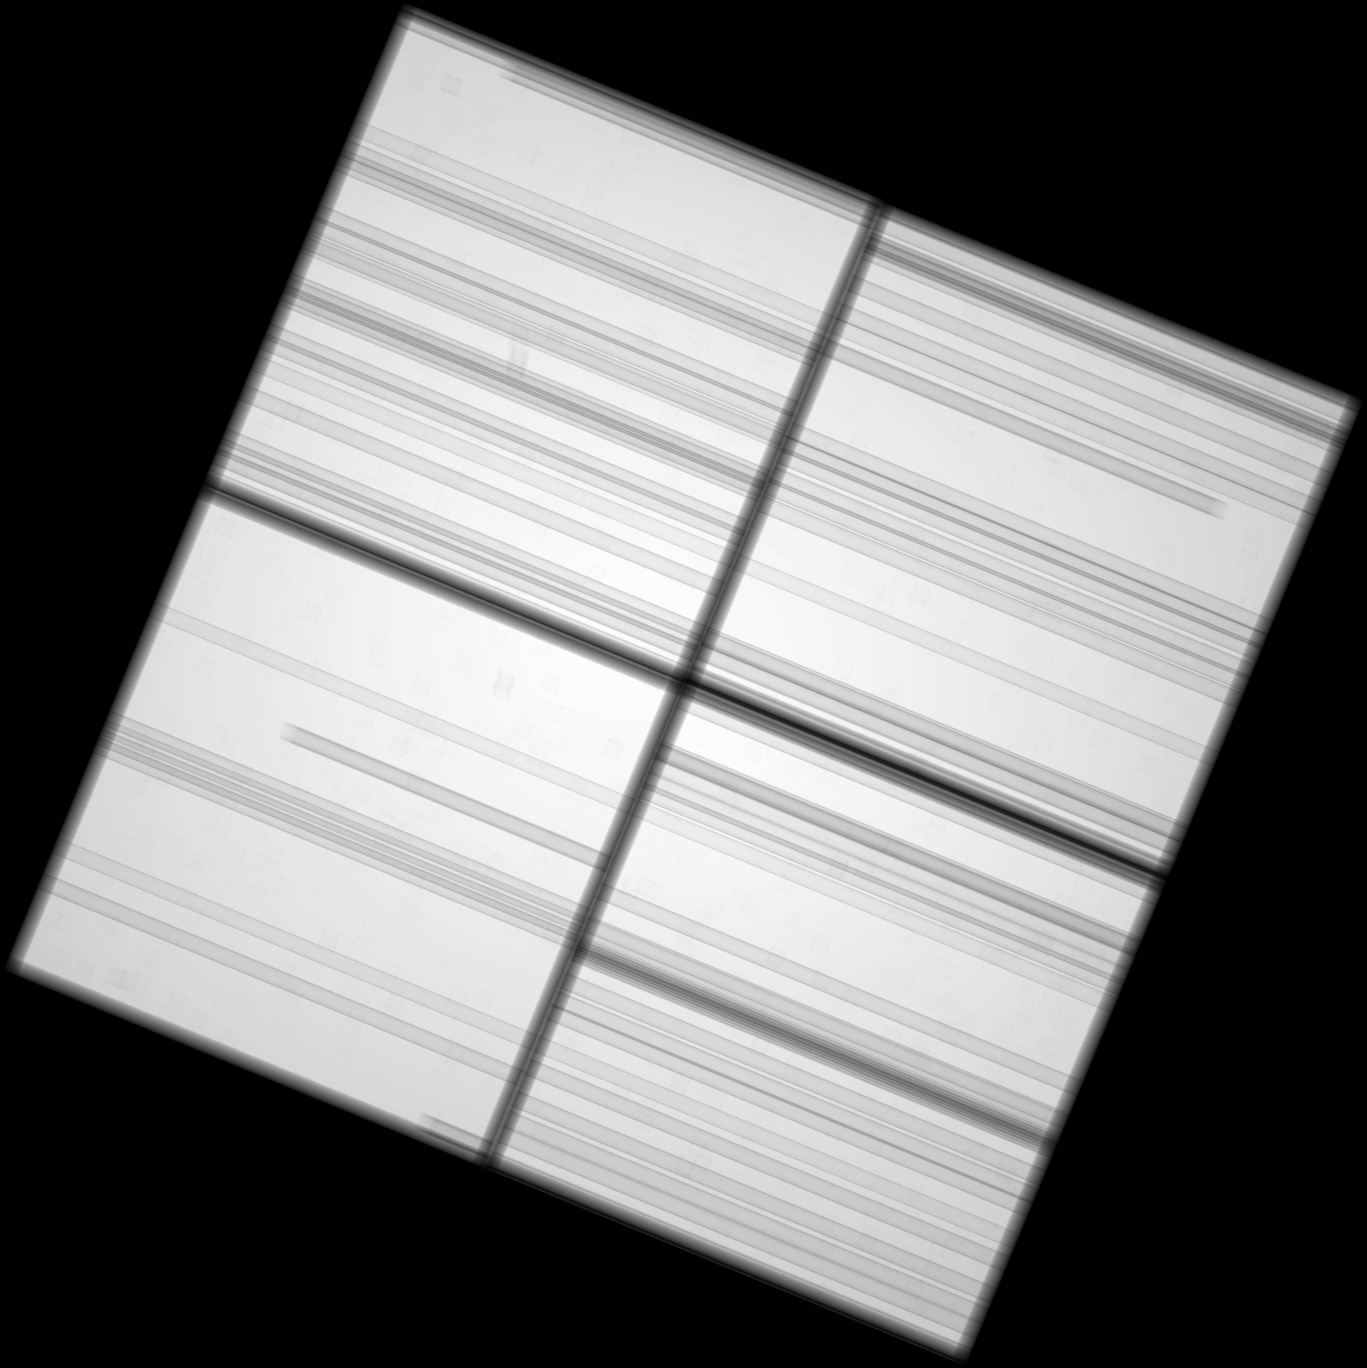

In [15]:
dmimg2jpg infile=3C295_broad_dss.expmap outfile=3C295_broad_dss.expmap.jpg\
  scalefun=linear clob+ minred=0 mode=h

display < 3C295_broad_dss.expmap.jpg

### Smooth exposure map.  We want to use `mean` here instead of median.

In [16]:
dmimgfilt 3C295_broad_dss.expmap 3C295_broad_dss_sm.expmap \
  mean "annulus(0,0,20,22)" cl+

### Get max pixel value, need for normalization

In [17]:
dmstat 3C295_broad_dss_sm.expmap cen-

3C295_broad_dss_sm.expmap[cm**2 s]
    min:	6170838.5 	      @:	( 5519.5 4701.5 )
    max:	24916426 	      @:	( 3959.5 4129.5 )
   mean:	20326534.098 
  sigma:	2854270.0074 
    sum:	2.2334653381e+13 
   good:	1098793 
   null:	771263 


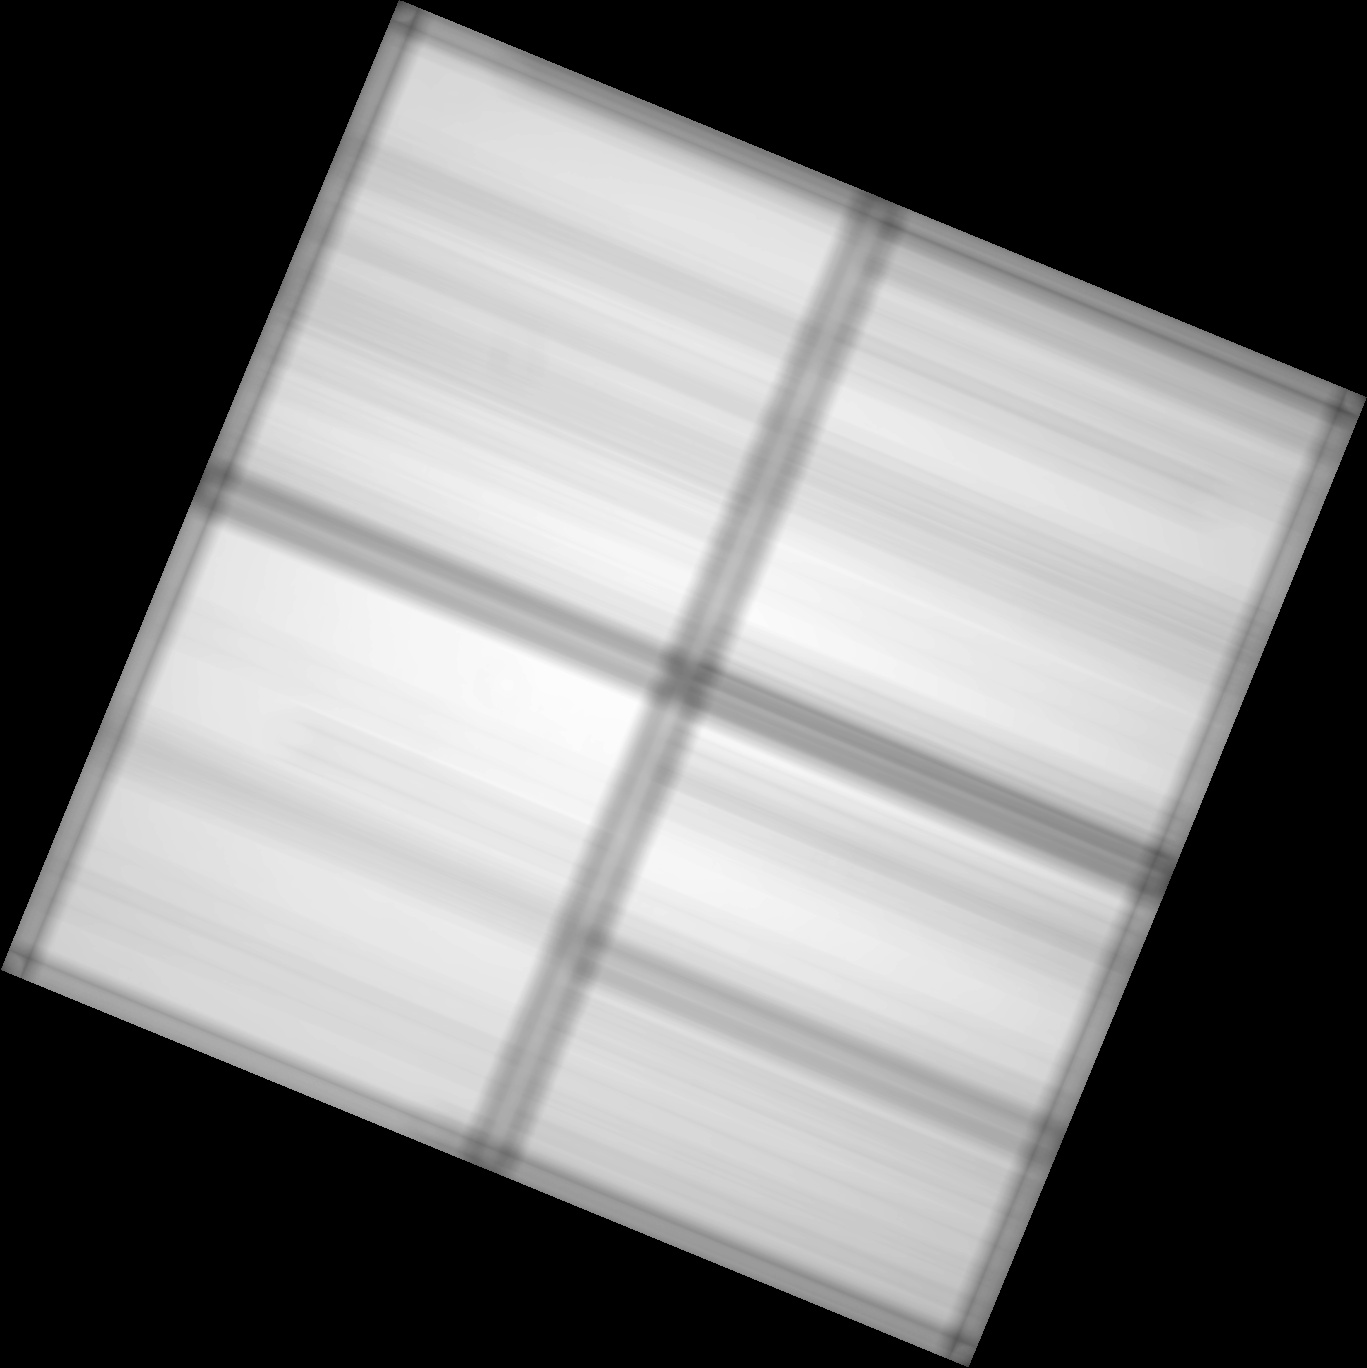

In [18]:
dmimg2jpg infile=3C295_broad_dss_sm.expmap outfile=3C295_broad_dss_sm.expmap.jpg\
  scalefun=linear clob+ minred=0 mode=h maxred=24916426

display < 3C295_broad_dss_sm.expmap.jpg

### Scale background, `img1`, by the exposure map, `img2`, normlizaed by the max exposure value.

In [19]:
dmimgcalc 3C295_broad_dss.bg,3C295_broad_dss_sm.expmap none \
  3C295_broad_dss.nbkg op="imgout=(img1/(img2/24916426))" cl+

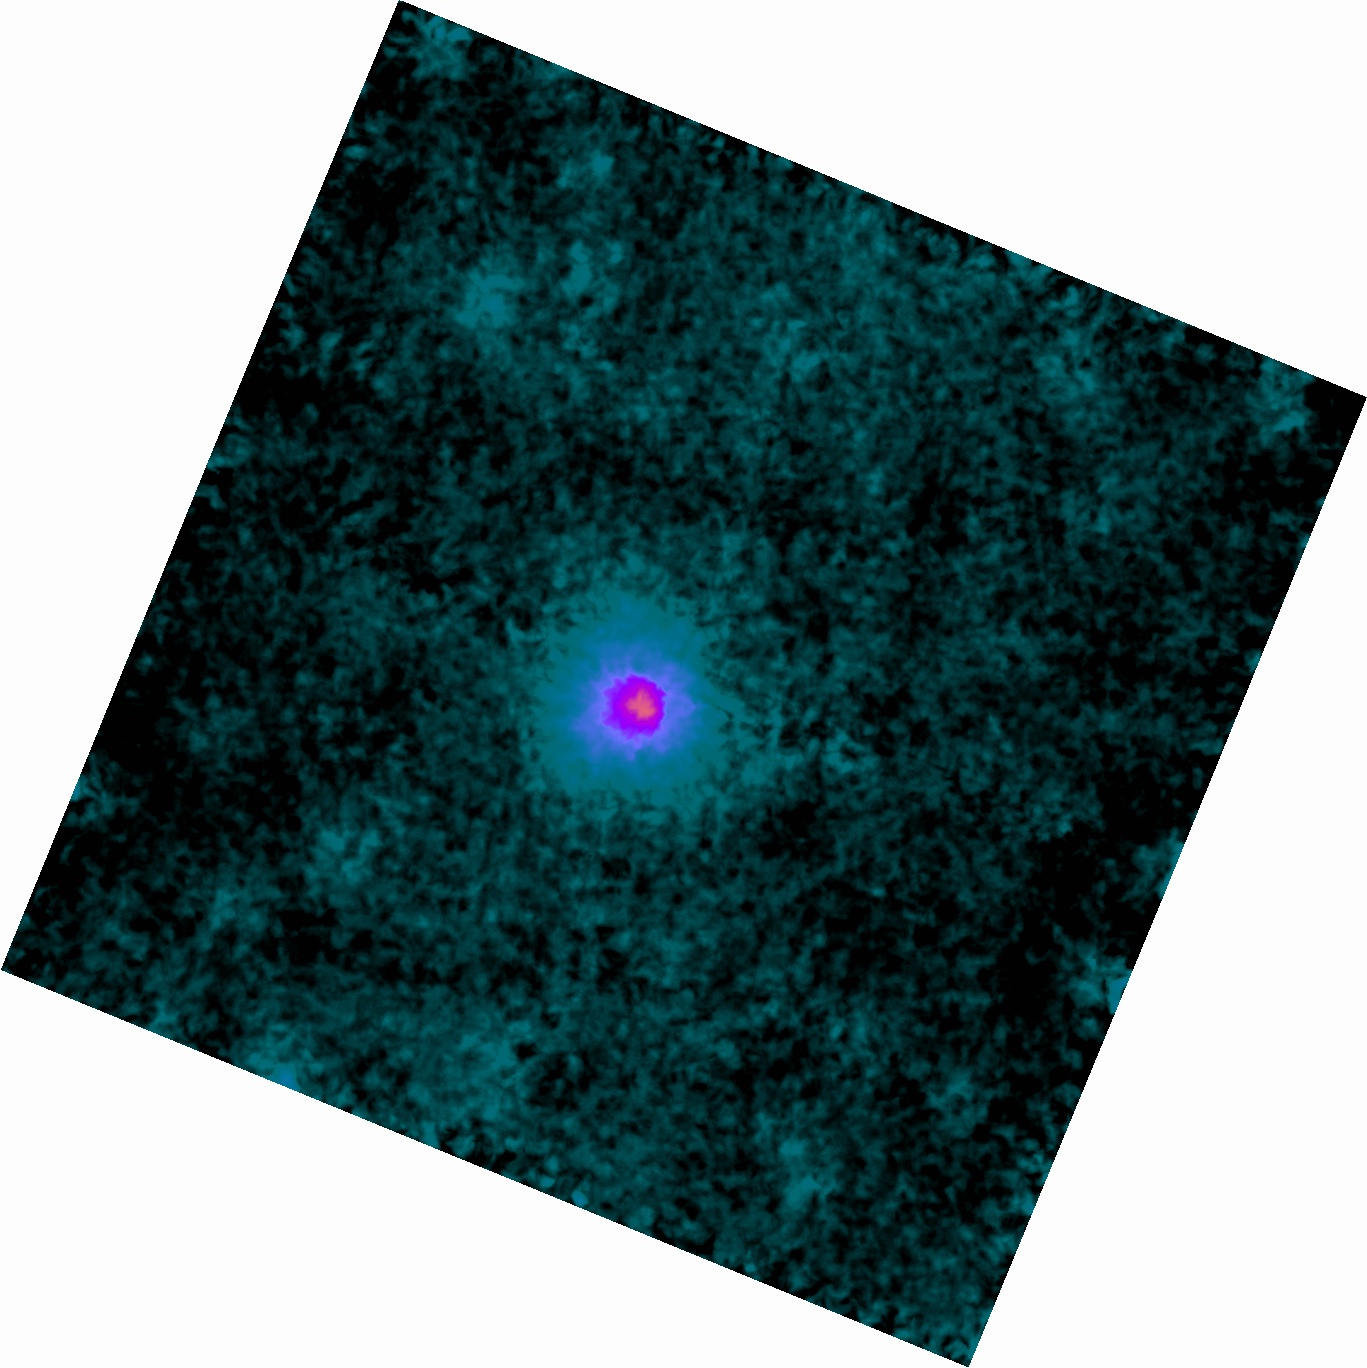

In [20]:
dmimg2jpg infile=3C295_broad_dss.nbkg outfile=3C295_broad_dss.nbkg.jpg\
  scalefun=log clob+ minred=0 mode=h maxred=35 lut=")imagej_lut.cequal"

display < 3C295_broad_dss.nbkg.jpg

In [21]:
# pset wavdetect bkginput=3C295_broad_dss.nbkg 

# Cleanup


In [22]:
/bin/rm -rf 2254
/bin/rm -rf acisf*fits pcadf*.fits acisf*.lis 
